# Exercise: Linear Regression

A) Use the advertising dataset, and fit a linear regression model that estimates the Sales from the TV advertising only (single feature). Find the P-value of the TV feature and the 95% confidence interval of the corresponding coefficients.
Does the confidence interval include the value of Zero? What does that imply?

The intercept is:  [ 2.00296357]
The coefficient of TV feature is: [[ 3.01084016]]


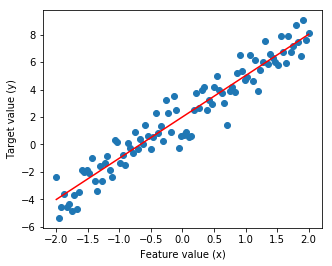

Mean square error 0.773586423104


In [31]:
##Class Exercise-In class
import numpy as np
beta0=2; beta1=3
stdDeviation=1; ErrMean=0; numberSamples=100
error = np.random.normal(loc=ErrMean, scale=stdDeviation, size=numberSamples)  # everytime it will generate different error dataset
x=np.linspace(-2,2,numberSamples)
y=beta0+beta1*x+error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y=y.reshape(-1,1); x=x.reshape(-1,1)
X_train, X_test, Y_train, Y_test= train_test_split(x, y, random_state= 0)

linreg= LinearRegression().fit(X_train, Y_train)
print("The intercept is: ", linreg.intercept_)
print("The coefficient of TV feature is:",linreg.coef_)


%matplotlib inline
import matplotlib.pyplot as plt
estimated_linearmodel= linreg.intercept_ + linreg.coef_ * x
plt.figure(figsize=(5,4))
plt.scatter(x, y, marker= 'o') #plot data points
plt.plot(x, estimated_linearmodel, 'r-')
plt.xlabel('Feature value (x)'); plt.ylabel('Target value (y)')
plt.show()


from sklearn.metrics import mean_squared_error
Target_predicted= linreg.predict(X_test)
MSE=mean_squared_error(Y_test,Target_predicted)
print('Mean square error', MSE)

In [ ]:
###Solution
The intercept is:  [ 2.03076117]
The coefficient of TV feature is: [[ 3.00195055]]
Mean square error 0.854998271838

The intercept is:  [ 2.09480979]
The coefficient of TV feature is: [[ 2.97017348]]
Mean square error 0.459407483695


In [32]:
##(A-Find the P-value of the TV feature and the 95% confidence interval of the corresponding coefficients.
##Does the confidence interval include the value of Zero? What does that imply
from pandas import read_csv
import statsmodels.formula.api as smf
AdvertisingData=read_csv('Advertising.csv')
# Complete you code here
print(AdvertisingData)
model=smf.ols('Sales ~ TV', AdvertisingData)
Fitting_results=model.fit()
print(Fitting_results.summary().tables[1])  
print('p-values are: \n', Fitting_results.pvalues)


     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
5             6    8.7   48.9       75.0    7.2
6             7   57.5   32.8       23.5   11.8
7             8  120.2   19.6       11.6   13.2
8             9    8.6    2.1        1.0    4.8
9            10  199.8    2.6       21.2   10.6
10           11   66.1    5.8       24.2    8.6
11           12  214.7   24.0        4.0   17.4
12           13   23.8   35.1       65.9    9.2
13           14   97.5    7.6        7.2    9.7
14           15  204.1   32.9       46.0   19.0
15           16  195.4   47.7       52.9   22.4
16           17   67.8   36.6      114.0   12.5
17           18  281.4   39.6       55.8   24.4
18           19   69.2   20.5       18.3   11.3
19           20  147.3   23.9       19.1

In [ ]:
###The 95% confidence interval is [0.042-0.053].It does not include zero which indicates that TV has impact on the advertising

B) Use the same 'Advertising' data set, and fit linear regression model that predicts Sales from TV, Radio, and Newspaper advertising using Sklearn linear_model module. What is the coefficients of the three features, and what is the MSE of the fitted model. 

Use random_state = 0 in train_test_split


C) Repeat B when TV and Radio are used, but newspaper is not used in the model. What is the MSE in this case. 

In [33]:
##B)
from pandas import read_csv
from sklearn.linear_model import LinearRegression
AdvertisingData=read_csv('Advertising.csv')
X=AdvertisingData[['Radio','TV','Newspaper']].values
Y=AdvertisingData.Sales
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=0)
linreg=LinearRegression().fit(X_train,Y_train) 
print("The intercept is: ", lm.intercept_)
print("The coefficients are",lm.coef_)
Target_predicted=linreg.predict(X_test) 
MSE=mean_squared_error(Y_test,Target_predicted) 
print('meansquareerror',MSE)



The intercept is:  2.92109991241
The coefficients are [ 0.18799423  0.04575482]
meansquareerror 4.01249752292


In [34]:
##C)
from pandas import read_csv
from sklearn.linear_model import LinearRegression
AdvertisingData=read_csv('Advertising.csv')
X=AdvertisingData[['Radio','TV']].values
Y=AdvertisingData.Sales
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=0)
linreg=LinearRegression().fit(X_train,Y_train) 
print("The intercept is: ", lm.intercept_)
print("The coefficients are",lm.coef_)
Target_predicted=linreg.predict(X_test) 
MSE=mean_squared_error(Y_test,Target_predicted) 
print('meansquareerror',MSE)


The intercept is:  2.92109991241
The coefficients are [ 0.18799423  0.04575482]
meansquareerror 3.99985266758


In [ ]:
##Mean Square error between with newspaper and without newspaper is very low